In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weather = pd.read_csv('https://github.com/alanjones2/dataviz/raw/master/londonweather.csv')

In [3]:
conn = sql.connect('weather.db')
weather.to_sql('weather', conn)

In [6]:
conn = sql.connect('weather.db')
weather = pd.read_sql('SELECT * FROM weather', conn)
weather.head()

,index,Year,Month,Tmax,Tmin,Rain,Sun
0,0,1957,1,8.7,2.7,39.5,53.0
1,1,1957,2,9.0,2.9,69.8,64.9
2,2,1957,3,13.9,5.7,25.4,96.7
3,3,1957,4,14.2,5.2,5.7,169.6
4,4,1957,5,16.2,6.5,21.3,195.0


In [7]:
y2010 = pd.read_sql('SELECT * FROM weather WHERE Year == 2010', conn)
y2010.head()

,index,Year,Month,Tmax,Tmin,Rain,Sun
0,636,2010,1,4.5,-0.3,51.8,51.3
1,637,2010,2,6.9,1.7,100.4,46.7
2,638,2010,3,11.1,3.7,39.8,106.4
3,639,2010,4,15.8,5.6,23.2,201.7
4,640,2010,5,17.3,7.7,20.6,170.4


In [8]:
y1960 = pd.read_sql('SELECT * FROM weather WHERE Year == 1960', conn)
y1960.head()

,index,Year,Month,Tmax,Tmin,Rain,Sun
0,36,1960,1,6.9,1.8,47.9,34.4
1,37,1960,2,7.9,1.6,48.0,80.1
2,38,1960,3,10.2,4.5,33.9,65.0
3,39,1960,4,14.3,4.6,12.4,156.1
4,40,1960,5,18.4,9.3,45.6,181.7


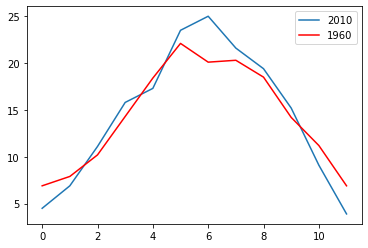

In [9]:
ax2010 = y2010.plot(y='Tmax')
ax = y1960.plot(y='Tmax',color = 'red', ax=ax2010)
ax.legend(['2010','1960'])

In [11]:
high = pd.read_sql('SELECT Year,Month,Tmax FROM weather WHERE Tmax > 25 ORDER BY Tmax DESC', conn)
high.head()

,Year,Month,Tmax
0,2018,7,28.3
1,2006,7,28.2
2,1983,7,27.6
3,1995,8,27.0
4,2013,7,27.0


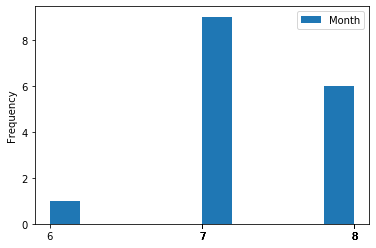

In [12]:
high.plot.hist(y='Month', xticks=high['Month'])

In [13]:
july = pd.read_sql('SELECT Year,Month,Tmax FROM weather WHERE month == 6', conn)
july.head()

,Year,Month,Tmax
0,1957,6,23.6
1,1958,6,19.4
2,1959,6,22.1
3,1960,6,22.1
4,1961,6,21.7


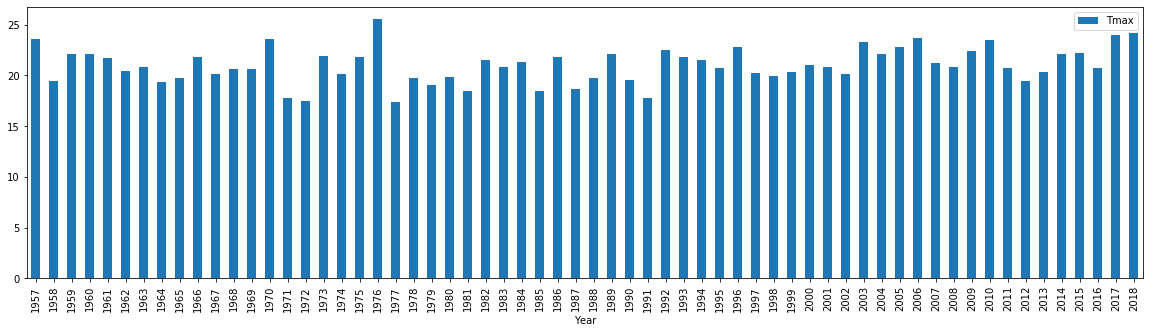

In [14]:
july.plot.bar(x='Year', y='Tmax', figsize=(20,5));